In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# Loading data

First, let's load the data and have a look at it.

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247


In [4]:
test.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,...,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN


In [5]:
print(train.shape, test.shape)

(3865, 80) (890, 79)


# EDA

Combine train and test for convenience and find number of observations for each part:

In [6]:
data = pd.concat([train, test], axis=0)

## Unique index

In [7]:
print("Whole dataset:")
print(f"Unique years: {len(data['galactic year'].unique())}")
print(f"Unique galaxies: {len(data['galaxy'].unique())}")
print("=" * 10)
print("Train dataset:")
print(f"Unique years: {len(train['galactic year'].unique())}")
print(f"Unique galaxies: {len(train['galaxy'].unique())}")
print("=" * 10)
print("Test dataset:")
print(f"Unique years: {len(test['galactic year'].unique())}")
print(f"Unique galaxies: {len(test['galaxy'].unique())}")

Whole dataset:
Unique years: 27
Unique galaxies: 181
Train dataset:
Unique years: 26
Unique galaxies: 181
Test dataset:
Unique years: 10
Unique galaxies: 172


(`galactic year`, `galaxy`) pair is unique index:

In [8]:
data[["galactic year", "galaxy"]].duplicated().sum()

0

We have a combination of `galactic year` and ` galaxy` as a unique index of DataFrame. Thus, it looks like this data is time-series for countries, referred to as "galaxies".

## What to predict

Let's have a look, for which index pair we have answers, and for each we need to predict answer (blue color means we have answer, or it is in train, red - need to predict, or it is in test):

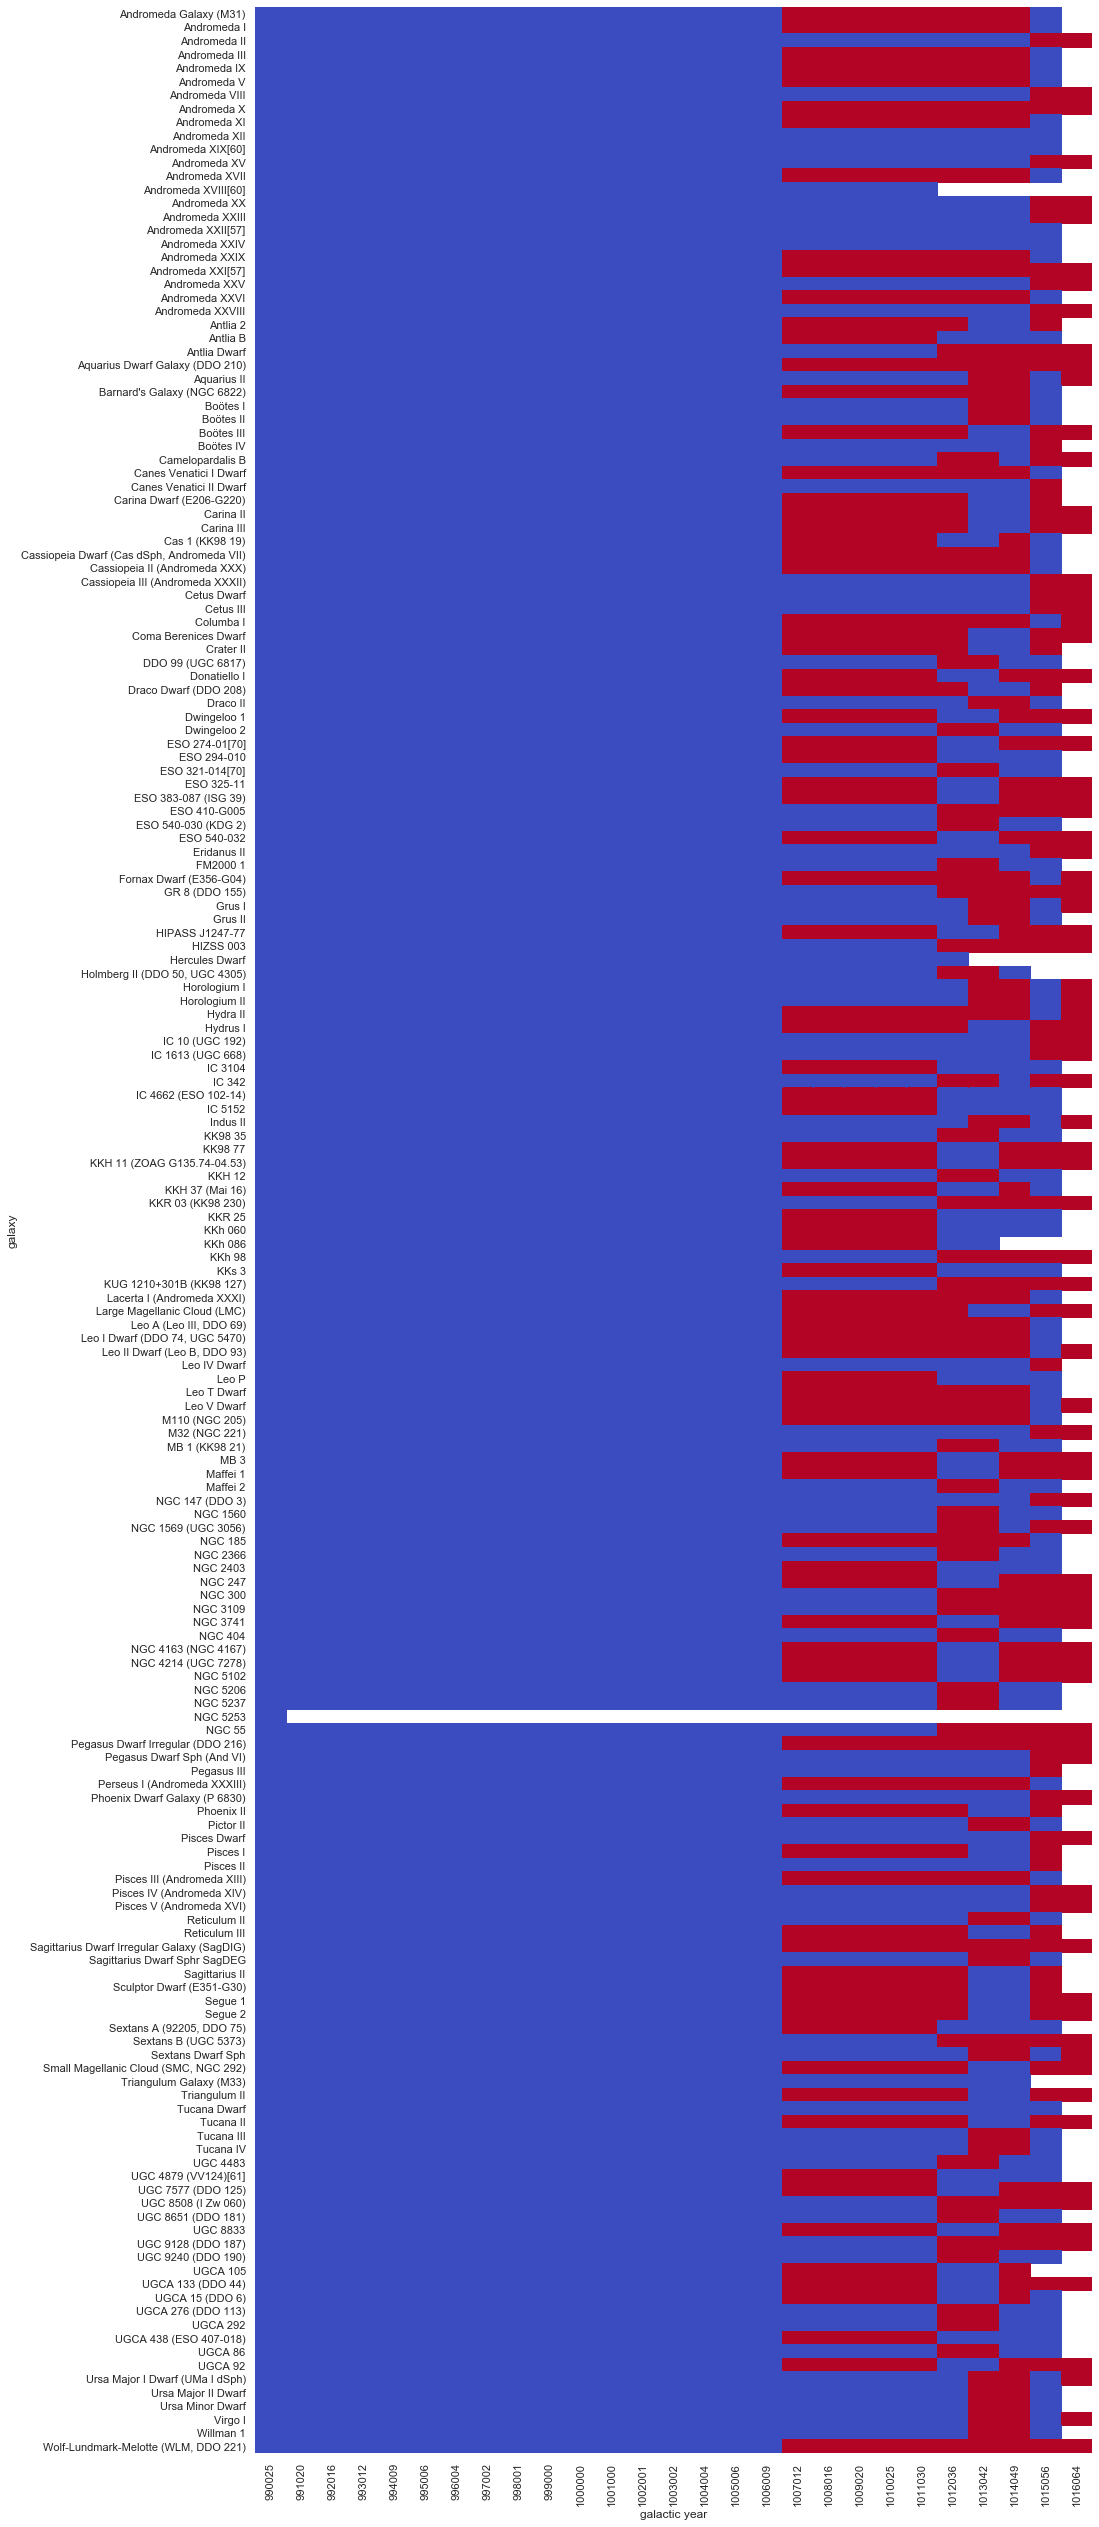

In [9]:
mask = data.pivot(index="galaxy", columns="galactic year", values="galaxy").isnull()
data_has_y = data.pivot(index="galaxy", columns="galactic year", values="y").isnull()
plt.figure(figsize=(15, 45))
sns.heatmap(data_has_y, cbar=False, mask=mask, cmap="coolwarm")
plt.show()

Test pairs starts from year 1007012. We can see one galaxy with only one observation in train, we can drop it.

## Answers distribution

Let's have a look at answers distributions in the same manner:

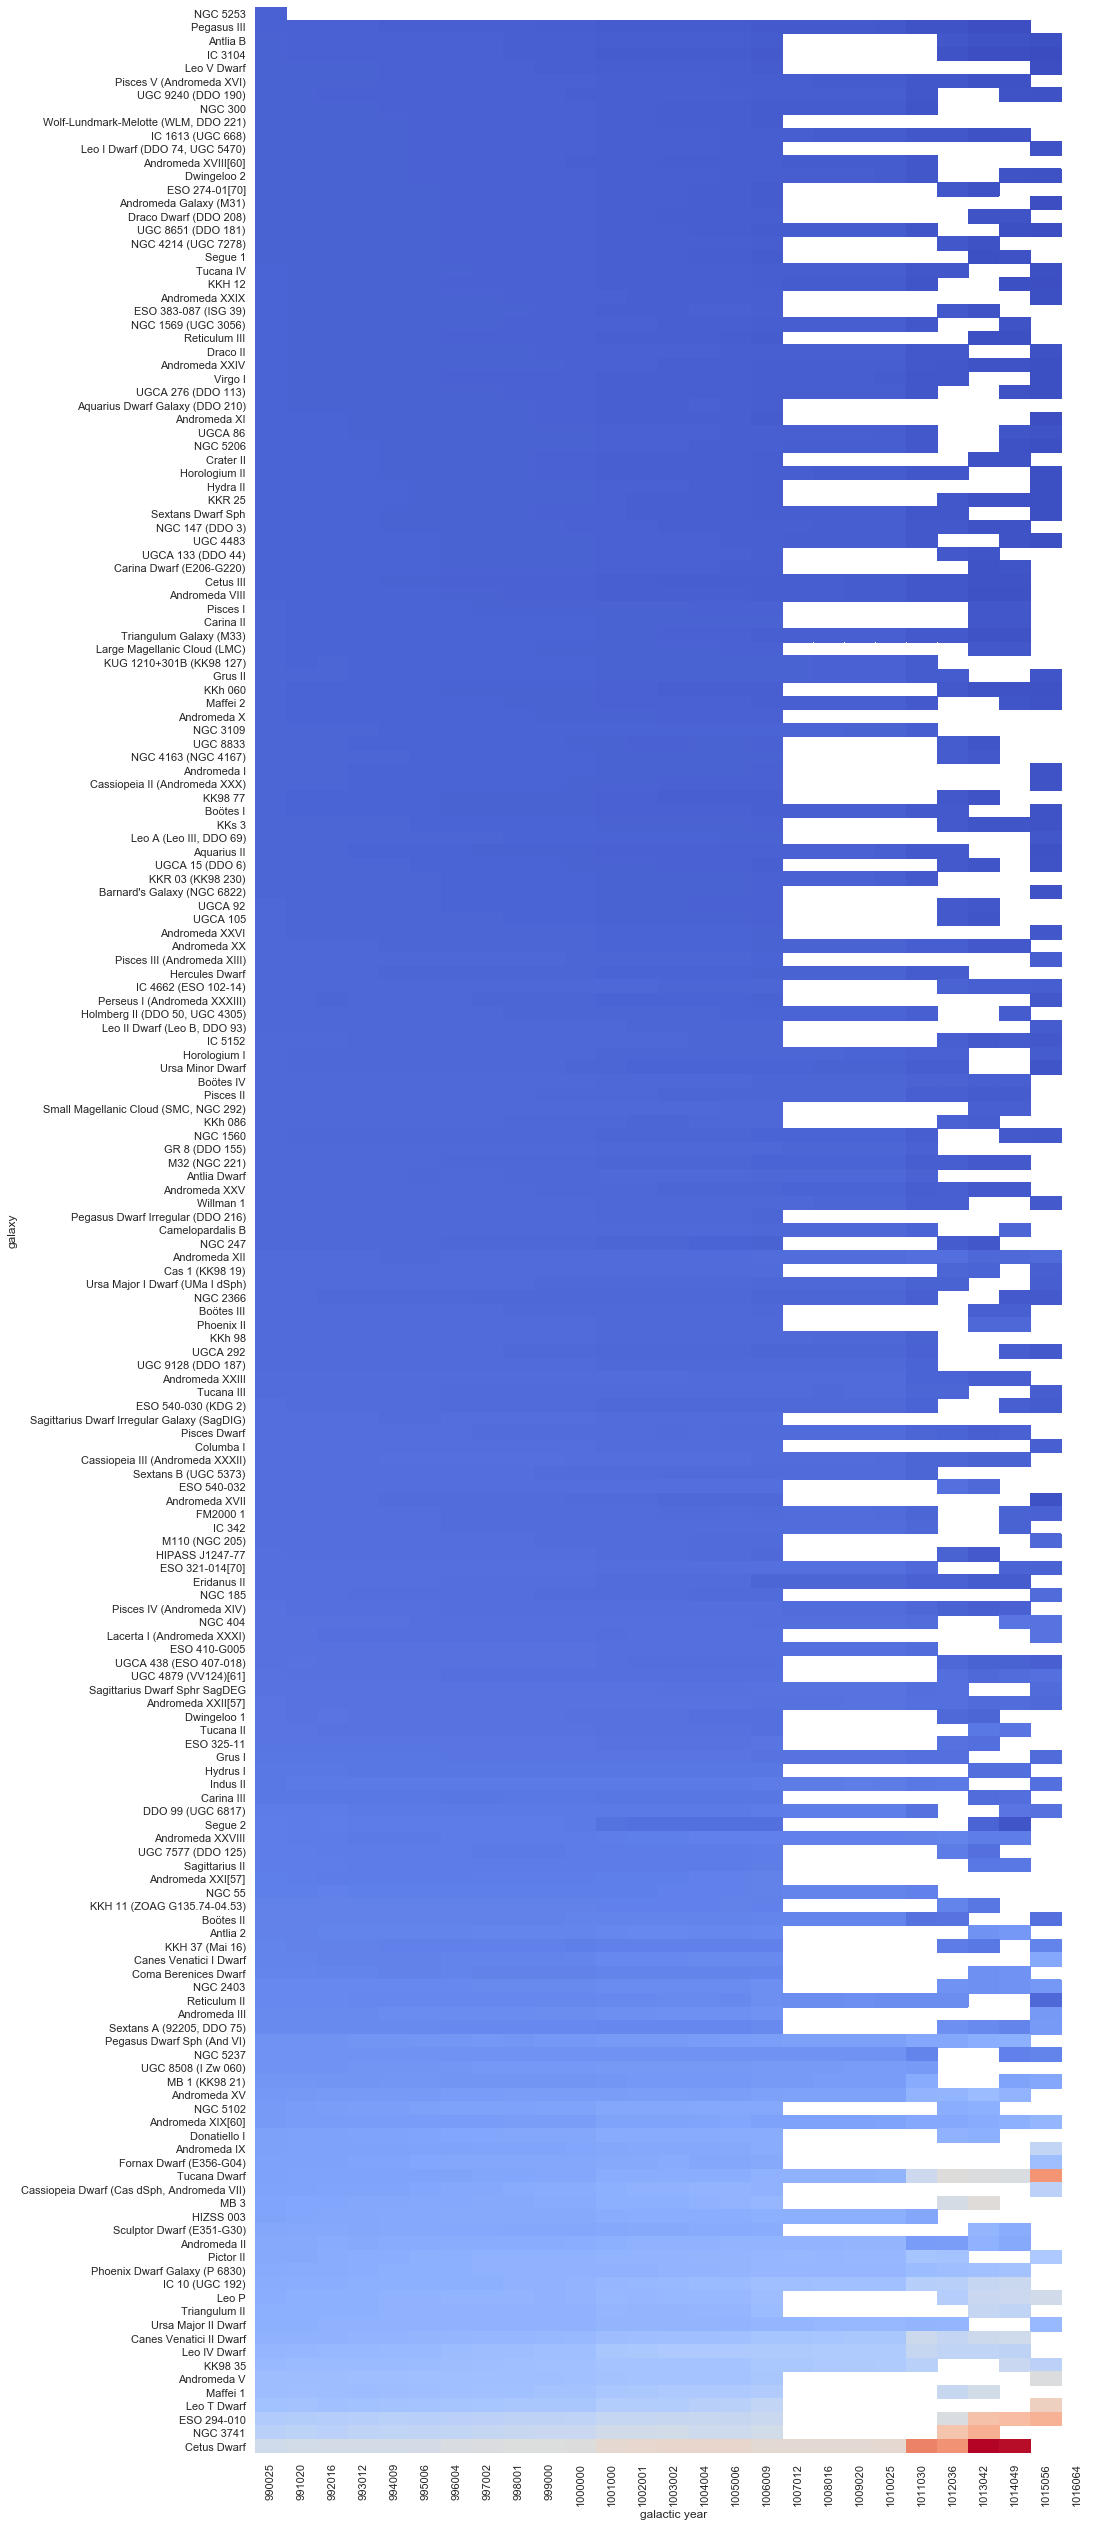

In [10]:
plt.figure(figsize=(15, 45))
sns.heatmap(data.pivot(index="galaxy", columns="galactic year", values="y").sort_values(990025), cbar=False, cmap="coolwarm")
plt.show()

We can see, that in second half of test data distribution significantly changes.

## Galaxies time-series

Let's create a plot showing how answers change for galaxies in time:

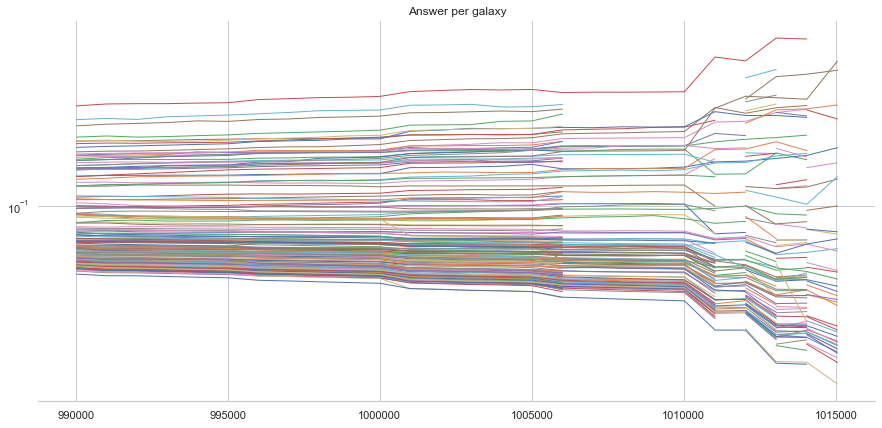

In [11]:
plt.figure(figsize=(15, 7))
plt.title("Answer per galaxy")
plt.plot(data.set_index(["galaxy", "galactic year"])["y"].unstack().T, lw=1)
sns.despine(left=True)
plt.yscale("log")
plt.show()

We can see, that their movement is very similar in certain groups.

## Decoding galactic years

Now let's find, what do 'galactic years' encode by finding difference between year and year, shifted by 2:

In [12]:
sorted_years = np.array(sorted(train["galactic year"].unique()))
print(sorted_years[2:] - sorted_years[:-2])

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]


Obviously, they encode the year of observation on our planet and represent the same order. For simplicity, we'll encode it using rank later.

That's all what we need for making a prediction.